<a href="https://colab.research.google.com/github/PauloAMatos777/Predict-5Sensors-LSTM/blob/main/Predict_5Sensors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 139ms/step - loss: 0.3186 - val_loss: 0.1378
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1576 - val_loss: 0.0473
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0543 - val_loss: 0.0668
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0330 - val_loss: 0.0784
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0314 - val_loss: 0.0266
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0187 - val_loss: 0.0080
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0133 - val_loss: 0.0093
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0138 - val_loss: 0.0139
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0113 - val_loss: 0.0134
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0086 - val_loss: 0.0108
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0068 - val_loss: 0.0092
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0064 - val_loss: 0.0075
Epoch 13/50

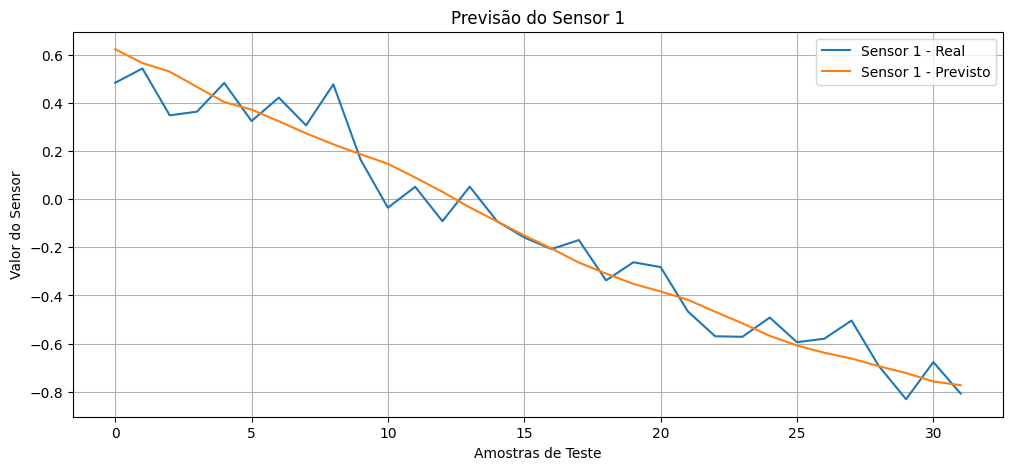

In [ ]:
# Etapa 1: Bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Etapa 2: Gerar dados simulados de 5 sensores
np.random.seed(42)
time_steps = 200
num_sensors = 5

# Criando 5 sinais com variações temporais
t = np.linspace(0, 10, time_steps)
data = np.stack([
    np.sin(t + np.random.rand()) + 0.1*np.random.randn(time_steps) for _ in range(num_sensors)
], axis=1)

# Etapa 3: Normalizar dados
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)


# Etapa 4: Criar sequências para LSTM
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

window_size = 40
X, y = create_sequences(data_scaled, window_size)

# Etapa 5: Dividir em treino e teste
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Etapa 6: Construir modelo LSTM
model = Sequential()
model.add(LSTM(64, input_shape=(window_size, num_sensors), return_sequences=False))
model.add(Dense(num_sensors))  # Prevendo os 5 sensores ao mesmo tempo
model.compile(optimizer='adam', loss='mse')

# Etapa 7: Treinar modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Etapa 8: Avaliar predições
y_pred = model.predict(X_test)

# Inverter normalização
y_test_inv = scaler.inverse_transform(y_test)
y_pred_inv = scaler.inverse_transform(y_pred)

# Etapa 9: Visualizar predições de um sensor
plt.figure(figsize=(12, 5))
plt.plot(y_test_inv[:, 0], label='Sensor 1 - Real')
plt.plot(y_pred_inv[:, 0], label='Sensor 1 - Previsto')
plt.legend()
plt.title('Previsão do Sensor 1')
plt.xlabel('Amostras de Teste')
plt.ylabel('Valor do Sensor')
plt.grid(True)
plt.show()




Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 128ms/step - loss: 0.4160 - val_loss: 0.1449
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2662 - val_loss: 0.1035
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.1639 - val_loss: 0.0763
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.1078 - val_loss: 0.0663
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0667 - val_loss: 0.0636
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0460 - val_loss: 0.0493
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0338 - val_loss: 0.0266
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0230 - val_loss: 0.0168
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0186 - val_loss: 0.0145
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0138 - val_loss: 0.0150
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.0128 - val_loss: 0.0169
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0129 - val_loss: 0.0153


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


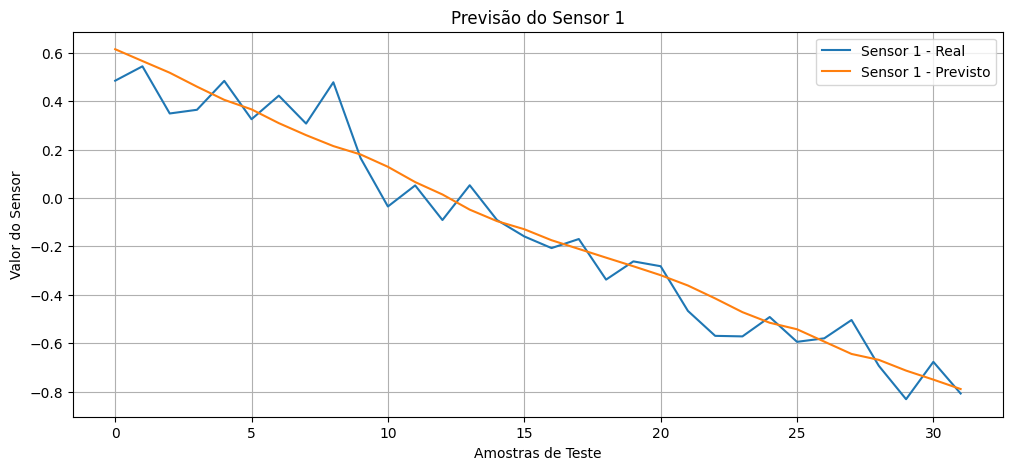

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


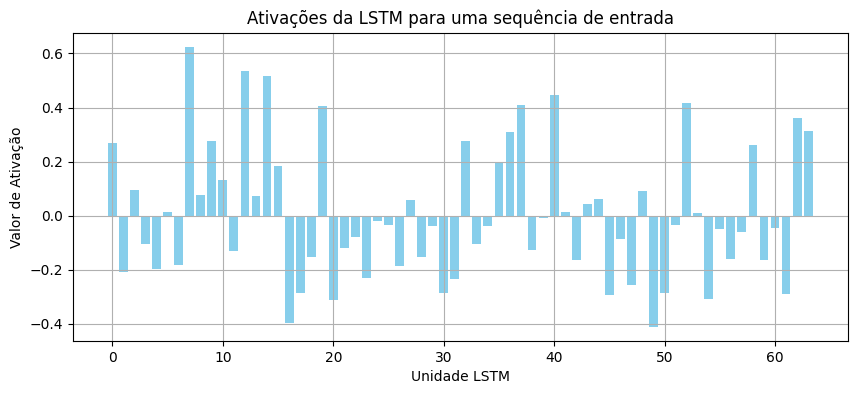

In [ ]:
# Etapa 1: Bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Etapa 2: Dados simulados de 5 sensores
np.random.seed(42)
time_steps = 200
num_sensors = 5
t = np.linspace(0, 10, time_steps)
data = np.stack([
    np.sin(t + np.random.rand()) + 0.1*np.random.randn(time_steps) for _ in range(num_sensors)
], axis=1)

# Etapa 3: Normalização para intervalo [-1, 1]
scaler = MinMaxScaler(feature_range=(-1, 1))
data_scaled = scaler.fit_transform(data)

# Etapa 4: Criar sequências
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

window_size = 40
X, y = create_sequences(data_scaled, window_size)

# Etapa 5: Dividir em treino e teste
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Etapa 6: Construir modelo LSTM com API Funcional
inputs = Input(shape=(window_size, num_sensors), name='entrada')
lstm_out = LSTM(64, return_sequences=False, name='lstm')(inputs)
outputs = Dense(num_sensors, activation='tanh', name='saida')(lstm_out)
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='mse')

# Etapa 7: Treinar modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Etapa 8: Avaliar predições
y_pred = model.predict(X_test)
y_test_inv = scaler.inverse_transform(y_test)
y_pred_inv = scaler.inverse_transform(y_pred)

# Etapa 9: Visualizar predições do Sensor 1
plt.figure(figsize=(12, 5))
plt.plot(y_test_inv[:, 0], label='Sensor 1 - Real')
plt.plot(y_pred_inv[:, 0], label='Sensor 1 - Previsto')
plt.legend()
plt.title('Previsão do Sensor 1')
plt.xlabel('Amostras de Teste')
plt.ylabel('Valor do Sensor')
plt.grid(True)
plt.show()

# Etapa 10: Visualizar ativações da camada LSTM
# Criar modelo auxiliar para acessar a saída da LSTM
lstm_output_model = Model(inputs=model.input, outputs=model.get_layer('lstm').output)

# Pegar uma sequência de entrada
sample_input = X_test[0:1]

# Obter ativações da LSTM
lstm_activations = lstm_output_model.predict(sample_input)  # shape: (1, 64)

# Visualizar as ativações como gráfico de barras
plt.figure(figsize=(10, 4))
plt.bar(np.arange(lstm_activations.shape[1]), lstm_activations[0], color='skyblue')
plt.title('Ativações da LSTM para uma sequência de entrada')
plt.xlabel('Unidade LSTM')
plt.ylabel('Valor de Ativação')
plt.grid(True)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


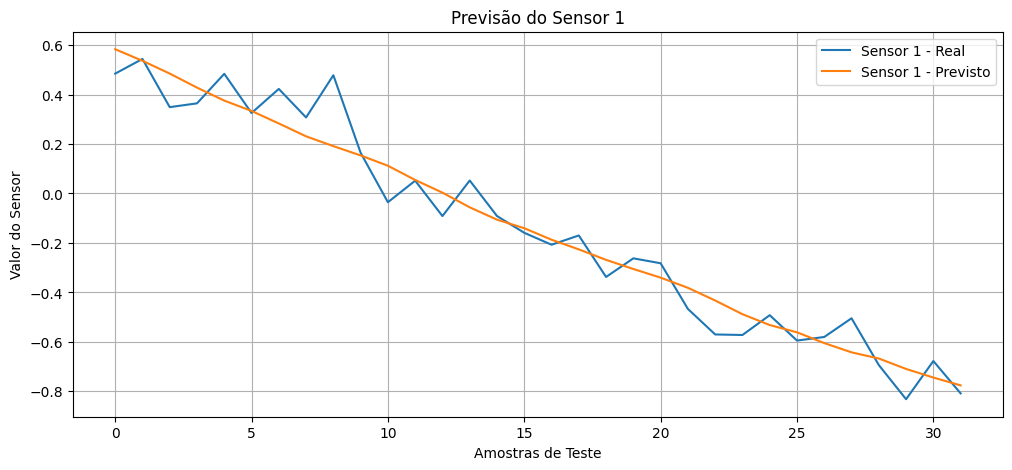

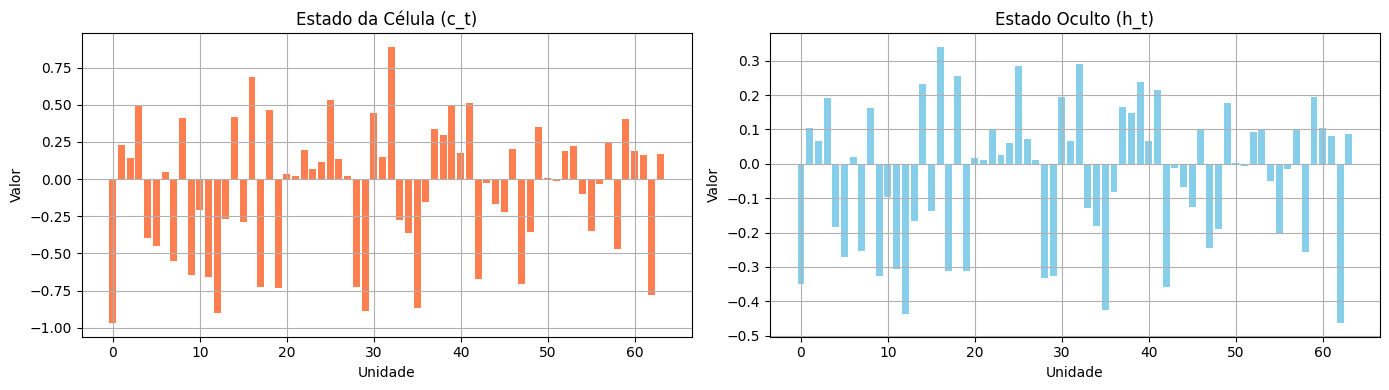

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LSTM, Layer
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

# Simular dados de sensores
np.random.seed(42)
time_steps = 200
num_sensors = 5
t = np.linspace(0, 10, time_steps)
data = np.stack([
    np.sin(t + np.random.rand()) + 0.1*np.random.randn(time_steps) for _ in range(num_sensors)
], axis=1)

# Normalização [-1, 1]
scaler = MinMaxScaler(feature_range=(-1, 1))
data_scaled = scaler.fit_transform(data)

# Criar sequências para LSTM
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

window_size = 40
X, y = create_sequences(data_scaled, window_size)
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# LSTM customizada para capturar c_t e h_t
class LSTMCellTracker(Layer):
    def __init__(self, units):
        super().__init__()
        self.lstm_cell = tf.keras.layers.LSTMCell(units)
        self.rnn = tf.keras.layers.RNN(self.lstm_cell, return_state=True, return_sequences=False)

    def call(self, inputs):
        output, h, c = self.rnn(inputs)
        self.last_h = h
        self.last_c = c
        return output

units = 64
inputs = Input(shape=(window_size, num_sensors))
lstm_tracker = LSTMCellTracker(units)
lstm_output = lstm_tracker(inputs)
dense_output = Dense(num_sensors, activation='tanh')(lstm_output)
model = Model(inputs, dense_output)
model.compile(optimizer='adam', loss='mse')

# Treinamento
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=0)

# Avaliação
y_pred = model.predict(X_test)
y_test_inv = scaler.inverse_transform(y_test)
y_pred_inv = scaler.inverse_transform(y_pred)

# Plotar predição do sensor 1
plt.figure(figsize=(12, 5))
plt.plot(y_test_inv[:, 0], label='Sensor 1 - Real')
plt.plot(y_pred_inv[:, 0], label='Sensor 1 - Previsto')
plt.legend()
plt.title('Previsão do Sensor 1')
plt.xlabel('Amostras de Teste')
plt.ylabel('Valor do Sensor')
plt.grid(True)
plt.show()

# Observar c_t e h_t para uma sequência de entrada
sample_input = tf.convert_to_tensor(X_test[0:1], dtype=tf.float32)
_ = model(sample_input)  # Passa pelo modelo

# Visualizar c_t (estado da célula) e h_t (estado oculto)
plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.bar(range(units), tf.squeeze(lstm_tracker.last_c).numpy(), color='coral')
plt.title("Estado da Célula (c_t)")
plt.xlabel("Unidade")
plt.ylabel("Valor")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.bar(range(units), tf.squeeze(lstm_tracker.last_h).numpy(), color='skyblue')
plt.title("Estado Oculto (h_t)")
plt.xlabel("Unidade")
plt.ylabel("Valor")
plt.grid(True)
plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


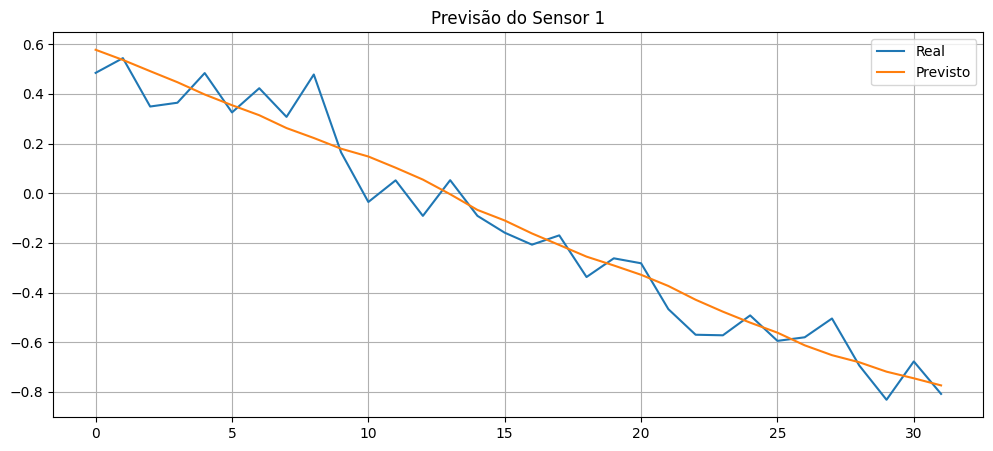

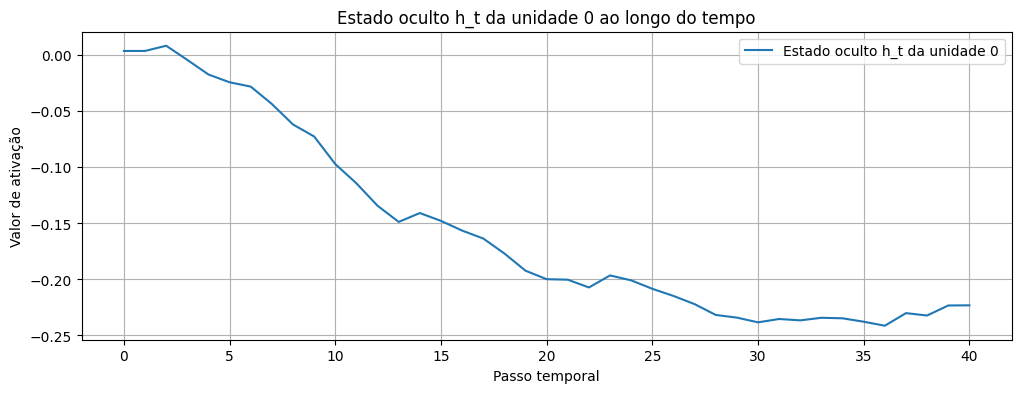

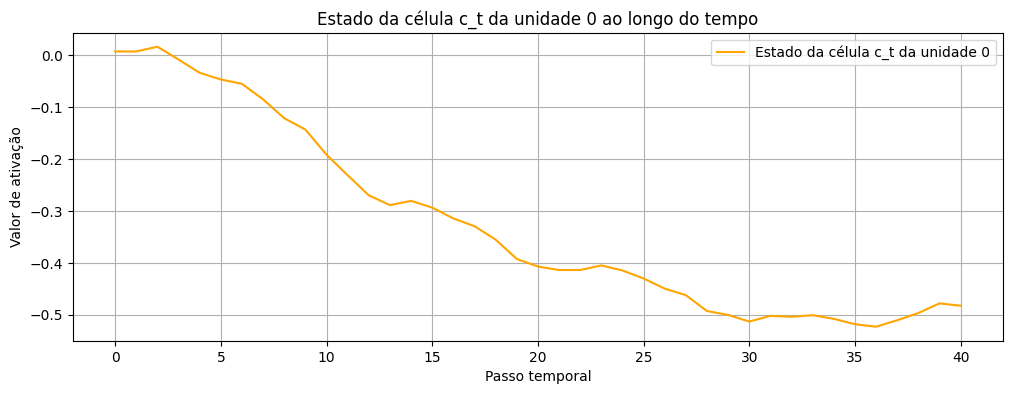

In [ ]:
#ESSE NOTEBOOK SERVE PARA MAPEAR CADA O ESTADO DAS UNIDADES OCULTAS DE ht e ct AO LOGO DO TEMPO
#TROQUE unit_idx PARA VISUALIZAR OUTRAS UNIDADES.
#Para problemas simples: units = 32 ou 64 geralmente funcionam bem.
#Para problemas complexos ou com muitas variáveis: units = 128+.
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Layer, RNN, LSTMCell
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import LSTM
import tensorflow as tf

# Dados simulados
np.random.seed(42)
time_steps = 200
num_sensors = 5
t = np.linspace(0, 10, time_steps)
data = np.stack([
    np.sin(t + np.random.rand()) + 0.1*np.random.randn(time_steps) for _ in range(num_sensors)
], axis=1)

# Normalização [-1, 1]
scaler = MinMaxScaler(feature_range=(-1, 1))
data_scaled = scaler.fit_transform(data)

# Criar sequências
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

window_size = 40
X, y = create_sequences(data_scaled, window_size)
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# LSTMCell customizado para retornar sequências de h e c
class LSTMCellTracker(LSTMCell):
    def __init__(self, units):
        super().__init__(units)
        self.all_h = None
        self.all_c = None

    def call(self, inputs, states, training=None):
        output, [h, c] = super().call(inputs, states, training=training)
        if self.all_h is None:
            self.all_h = []
            self.all_c = []
        self.all_h.append(h)
        self.all_c.append(c)
        return output, [h, c]

class LSTMTracker(Layer):
    def __init__(self, units):
        super().__init__()
        self.units = units
        self.cell = LSTMCellTracker(units)
        self.rnn = RNN(self.cell, return_sequences=True, return_state=True)

    def call(self, inputs):
        self.cell.all_h = []
        self.cell.all_c = []
        outputs, h, c = self.rnn(inputs)
        # all_h e all_c têm o estado por passo (lista de tensores)
        # Convertendo listas para tensores (time_steps, batch, units)
        self.all_h = tf.stack(self.cell.all_h, axis=1)
        self.all_c = tf.stack(self.cell.all_c, axis=1)
        return outputs, h, c

units = 64
inputs = Input(shape=(window_size, num_sensors))
lstm_layer = LSTM(units, return_sequences=True, return_state=True)
lstm_outputs, h_state, c_state = lstm_layer(inputs)

dense_output = Dense(num_sensors, activation='tanh')(lstm_outputs[:, -1, :])  # só último passo para saída
model = Model(inputs, dense_output)
model.compile(optimizer='adam', loss='mse')

# Treinar
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=0)

# Previsão
y_pred = model.predict(X_test)
y_test_inv = scaler.inverse_transform(y_test)
y_pred_inv = scaler.inverse_transform(y_pred)

# Plot previsão sensor 1
plt.figure(figsize=(12,5))
plt.plot(y_test_inv[:,0], label='Real')
plt.plot(y_pred_inv[:,0], label='Previsto')
plt.title("Previsão do Sensor 1")
plt.legend()
plt.grid(True)
plt.show()

# Instanciar o rastreador de estados (não usado para previsão, apenas para análise interna)
lstm_tracker = LSTMTracker(units=64)

# Passar a mesma entrada do teste para o rastreador
sample_input = tf.convert_to_tensor(X_test[0:1], dtype=tf.float32)
outputs, h_last, c_last = lstm_tracker(sample_input)

# Analisar ativação ao longo do tempo para uma sequência teste
sample_input = tf.convert_to_tensor(X_test[0:1], dtype=tf.float32)
outputs, h_last, c_last = lstm_tracker(sample_input)

# outputs.shape = (1, window_size, units)
# all_h e all_c do objeto lstm_tracker
all_h = lstm_tracker.all_h.numpy().squeeze()  # shape (window_size, units)
all_c = lstm_tracker.all_c.numpy().squeeze()

# Plot estado oculto (h_t) de uma unidade específica ao longo do tempo
unit_idx = 0  # pode trocar para qualquer unidade até 63

plt.figure(figsize=(12,4))
plt.plot(all_h[:, unit_idx], label=f'Estado oculto h_t da unidade {unit_idx}')
plt.title(f'Estado oculto h_t da unidade {unit_idx} ao longo do tempo')
plt.xlabel('Passo temporal')
plt.ylabel('Valor de ativação')
plt.grid(True)
plt.legend()
plt.show()

# Plot estado da célula (c_t) da mesma unidade
plt.figure(figsize=(12,4))
plt.plot(all_c[:, unit_idx], label=f'Estado da célula c_t da unidade {unit_idx}', color='orange')
plt.title(f'Estado da célula c_t da unidade {unit_idx} ao longo do tempo')
plt.xlabel('Passo temporal')
plt.ylabel('Valor de ativação')
plt.grid(True)
plt.legend()
plt.show()

#Troque unit_idx para visualizar outras unidades.
#O gráfico de h_t mostra a saída da célula para cada passo.
#O gráfico de c_t mostra o “conteúdo da memória” interno ao longo da sequência.
#Imagine que as units são neurônios de memória. Cada um:
#Observa a sequência de entrada
#Decide o que memorizar, esquecer ou atualizar (via portas sigmoid e tanh),
#E contribui com sua própria saída h_t[i].